<a href="https://colab.research.google.com/github/MitchMessier/BusinessAnalytics/blob/main/Lab7_Retailer_EDA2_Messier_Mitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [192]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [193]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [194]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

In [195]:
df.head()

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [197]:
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


In [198]:
df.isnull().sum()

customer_id           0
customer_name         0
address_line_1      121
city                 53
state_province        0
postal_code         153
order_id              0
order_date          257
customer_id.1         0
order_id.1            0
product_id            0
quantity             56
product_id.1          0
product_name          0
product_price         0
total_amount         56
order_year_month    257
order_month         257
dtype: int64

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [199]:
#data preparation
df['postal_code'] = df['postal_code'].astype('Int64')
df['quantity'] = df['quantity'].astype('Int64')
df['product_price'] = df['product_price'].str.replace('$', '').astype(float)
df['total_amount'] = df['total_amount'].str.replace('[$,]', '', regex=True).astype(float)

df['state_province'] = df['state_province'].astype('category')
df['city'] = df['city'].astype('category')

<ipython-input-199-4552d339c777>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['product_price'] = df['product_price'].str.replace('$', '').astype(float)


In [200]:
#outlier check and cleanup

def remove_outliers(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(lambda x: np.abs((x - x.mean()) / x.std()))
    outlier_mask = z_scores > threshold
    return df[~outlier_mask.any(axis=1)]

df = remove_outliers(df)

In [201]:
#impute values

median_quantity = df['quantity'].median()
df['quantity'].fillna(median_quantity, inplace=True)

<ipython-input-201-23ad9e0ba61d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity'].fillna(median_quantity, inplace=True)


In [202]:
df.dropna(inplace=True)

<ipython-input-202-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


**Explanantion to imputing:** As we can see in the profiling section, the data address_line_1, city, postal_code, order_date, quantity, total_amount, order_year_month, and order_month has missing values. I'm going to only inpute values with one variable (quantity) so it doesn't affect the data strongly. I will take the median and replace all those values with that data point.

In [203]:
#total amount column
df['total_amount_calculation'] = df['quantity'] * df['product_price']

<ipython-input-203-9cff94fafece>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount_calculation'] = df['quantity'] * df['product_price']


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [204]:
#create variable

customer_fields = ['customer_id', 'customer_name', 'address_line_1', 'city', 'state_province', 'postal_code']
df['complete_customer_info'] = (df[customer_fields].notnull().all(axis=1)).astype(int)

<ipython-input-204-6139aad21f60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complete_customer_info'] = (df[customer_fields].notnull().all(axis=1)).astype(int)


<ipython-input-205-8e7ab8120809>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complete_customer_info'] = df[customer_fields].notnull().all(axis=1)


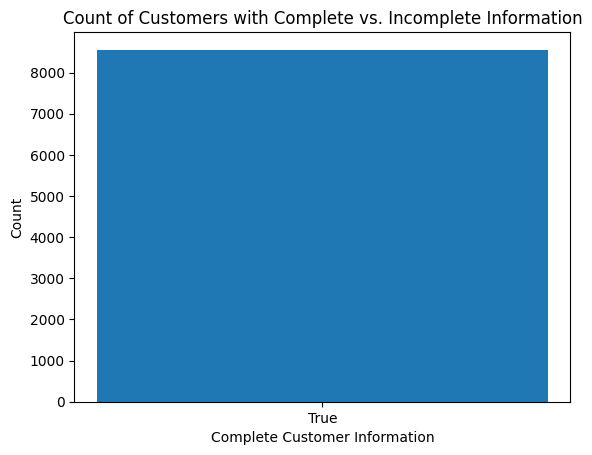

In [205]:
#create chart

customer_fields = ['customer_id', 'customer_name', 'address_line_1', 'city', 'state_province', 'postal_code']
df['complete_customer_info'] = df[customer_fields].notnull().all(axis=1)
customer_info_counts = df['complete_customer_info'].value_counts()
plt.bar(customer_info_counts.index.astype(str), customer_info_counts.values)
plt.xlabel('Complete Customer Information')
plt.ylabel('Count')
plt.title('Count of Customers with Complete vs. Incomplete Information')
plt.show()

**Explanation:** It's important to note that we removed rows with null values so all customers will have completly filled out values. If we performed this step earlier, we would return lots of customers with unfilled values. In this scenerio, this is a good sign because we have information about every customer.

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [211]:
# Create seasonal buckets

def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['order_month'].apply(get_season)

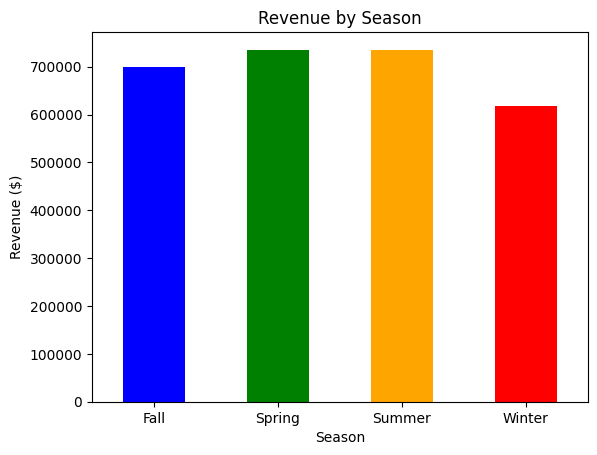

In [212]:
# Revenue by season
seasonal_revenue = df.groupby('season')['total_amount_calculation'].sum()
seasonal_revenue.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Season')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Season')
plt.xticks(rotation=0)
plt.show()

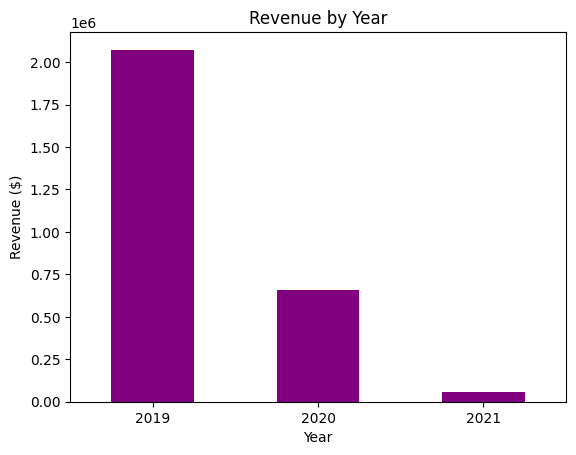

In [213]:
# Revenue over time
yearly_revenue = df.groupby('order_year')['total_amount_calculation'].sum()
yearly_revenue.plot(kind='bar', color='purple')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Year')
plt.xticks(rotation=0)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [209]:
#indoor/outdoor variable

def categorize_product(product_name):
    outdoor_keywords = ['Great value Juice', 'Dove deodorant', 'Apple iPhone X', 'Samsung Galaxy Note 10']
    for keyword in outdoor_keywords:
        if keyword in product_name:
            return 'Outdoor'
    return 'Indoor'

df['product_category'] = df['product_name'].apply(categorize_product)

<Figure size 1000x600 with 0 Axes>

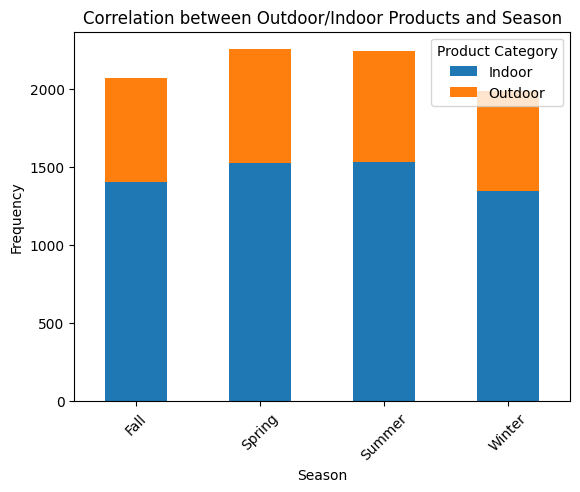

In [210]:
plt.figure(figsize=(10, 6))
pd.crosstab(df['season'], df['product_category']).plot(kind='bar', stacked=True)
plt.title('Correlation between Outdoor/Indoor Products and Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()